In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load data
df = pd.read_csv('../data/raw/diabetes.csv')
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Preprocess
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

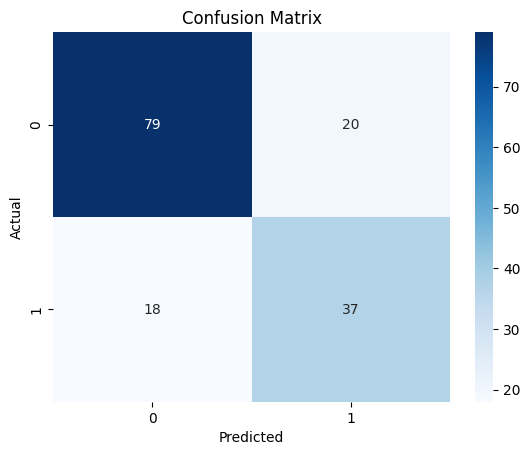

In [3]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

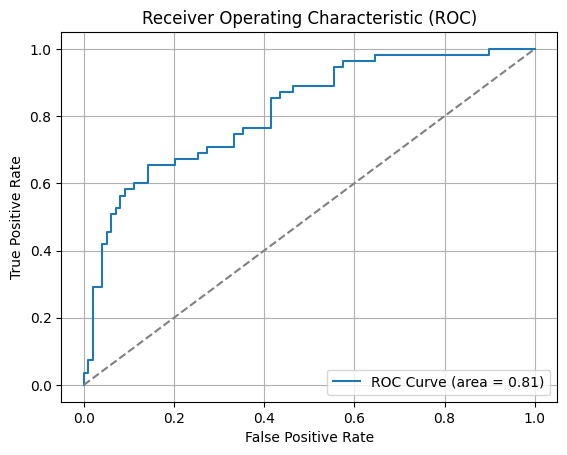

In [4]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

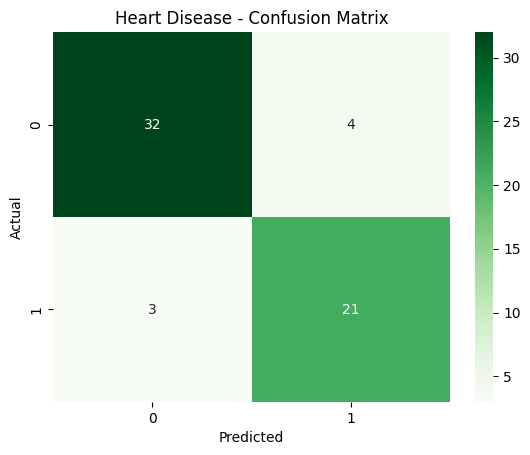

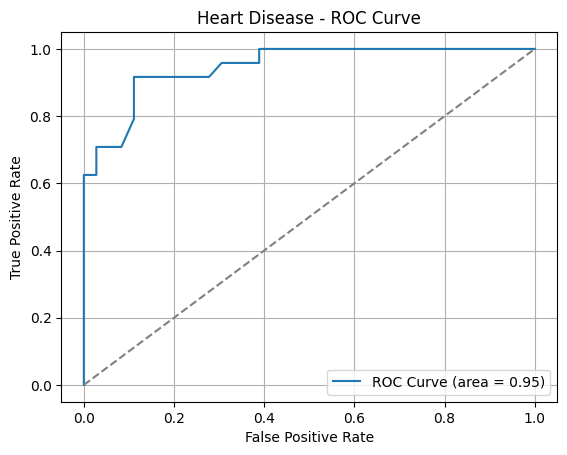

In [2]:
# Data and Plotting Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn Utilities
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    auc,
    ConfusionMatrixDisplay
)

# For Saving Models
import joblib

# Optional: Clean display
import warnings
warnings.filterwarnings('ignore')

# Matplotlib Inline for Jupyter (only needed inside notebooks)
%matplotlib inline
# Load cleaned heart dataset
df_heart = pd.read_csv('../data/processed/heart_cleaned.csv')
X_heart = df_heart.drop('target', axis=1)
y_heart = df_heart['target']

# Scale and split
scaler_heart = StandardScaler()
X_heart_scaled = scaler_heart.fit_transform(X_heart)
X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(X_heart_scaled, y_heart, test_size=0.2, random_state=42)

# Train model (use the same as in training: RandomForestClassifier)
from sklearn.ensemble import RandomForestClassifier
model_heart = RandomForestClassifier(n_estimators=100, random_state=42)
model_heart.fit(X_train_h, y_train_h)
y_pred_h = model_heart.predict(X_test_h)
y_proba_h = model_heart.predict_proba(X_test_h)[:, 1]

# Confusion Matrix
cm_h = confusion_matrix(y_test_h, y_pred_h)
sns.heatmap(cm_h, annot=True, fmt="d", cmap="Greens")
plt.title("Heart Disease - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr_h, tpr_h, _ = roc_curve(y_test_h, y_proba_h)
roc_auc_h = auc(fpr_h, tpr_h)

plt.figure()
plt.plot(fpr_h, tpr_h, label='ROC Curve (area = %0.2f)' % roc_auc_h)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Heart Disease - ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()